In [1]:
from obspy import UTCDateTime
import obspy as obs
from obspy.clients.fdsn import Client as FDSN_Client
from ground_motion_qh import get_waveforms


In [6]:
t1 = UTCDateTime(2009, 3, 24)
t2 = UTCDateTime(2009, 3, 24, 1, 0, 0)


stname = ['SND']
network = 'AZ'
org = 'IRIS'
client = FDSN_Client(org)


In [9]:
import importlib
importlib.reload(get_waveforms)

<module 'ground_motion_qh.get_waveforms' from '/mnt/c/Users/user/Documents/code/GroundMotion_GH/ground_motion_qh/get_waveforms.py'>

In [10]:
stream_dict = get_waveforms.get_stream_multiple_stations(
  t1=t1,
  t2=t2,
)

In [11]:
stream_dict

{'SND': 3 Trace(s) in Stream:
AZ.SND..HHE | 2009-03-24T00:00:00.000000Z - 2009-03-24T01:00:00.000000Z | 100.0 Hz, 360001 samples
AZ.SND..HHN | 2009-03-24T00:00:00.000000Z - 2009-03-24T01:00:00.000000Z | 100.0 Hz, 360001 samples
AZ.SND..HHZ | 2009-03-24T00:00:00.000000Z - 2009-03-24T01:00:00.000000Z | 100.0 Hz, 360001 samples}

In [12]:
stream_dict

{'SND': 3 Trace(s) in Stream:
AZ.SND..HHE | 2009-03-24T00:00:00.000000Z - 2009-03-24T03:00:00.000000Z | 100.0 Hz, 1080001 samples
AZ.SND..HHN | 2009-03-24T00:00:00.000000Z - 2009-03-24T03:00:00.000000Z | 100.0 Hz, 1080001 samples
AZ.SND..HHZ | 2009-03-24T00:00:00.000000Z - 2009-03-24T03:00:00.000000Z | 100.0 Hz, 1080001 samples}

In [29]:
stream_dict['SND'][0].meta

               network: AZ
               station: SND
              location: 
               channel: HHE
             starttime: 2009-03-24T00:00:00.000000Z
               endtime: 2009-03-24T03:00:00.000000Z
         sampling_rate: 100.0
                 delta: 0.01
                  npts: 1080001
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 289, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 1183744})
            processing: ['ObsPy 1.4.2: trim(endtime=UTCDateTime(2009, 3, 24, 3, 0)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2009, 3, 24, 0, 0))']

In [37]:
import importlib
importlib.reload(get_waveforms)

<module 'ground_motion_qh.get_waveforms' from '/mnt/c/Users/user/Documents/code/GroundMotion_GH/ground_motion_qh/get_waveforms.py'>

In [32]:
preprocessed_stream = get_waveforms.preprocess_waveforms(stream_dict['SND'])

0.0
10800.0


In [38]:
amplitude, times = get_waveforms.raw_stream_to_amplitude_and_times(stream_dict['SND'])

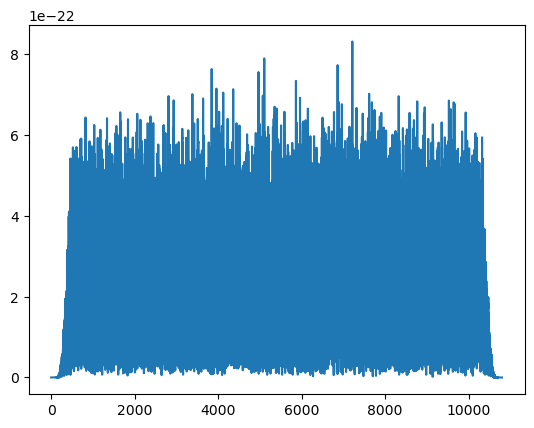

In [40]:
from matplotlib import pyplot as plt


plt.plot(times, amplitude)

In [33]:
preprocessed_stream

3 Trace(s) in Stream:
AZ.SND..HHE | 2009-03-24T00:00:00.000000Z - 2009-03-24T03:00:00.000000Z | 100.0 Hz, 1080001 samples
AZ.SND..HHN | 2009-03-24T00:00:00.000000Z - 2009-03-24T03:00:00.000000Z | 100.0 Hz, 1080001 samples
AZ.SND..HHZ | 2009-03-24T00:00:00.000000Z - 2009-03-24T03:00:00.000000Z | 100.0 Hz, 1080001 samples

In [36]:
preprocessed_stream[0].waveform

AttributeError: 'Trace' object has no attribute 'waveform'

In [ ]:

for i, comp in enumerate(['HHE', 'HHN', 'HHZ']):
  land_st1 = client.get_waveforms(network, str(stname[0]), "*", str(comp), t1, t2)

land_st1_original = land_st1.copy()

In [5]:
land_st1 = land_st1_original.copy()
land_st1.detrend()
land_st1.taper(max_percentage=0.05)
land_st1.filter('highpass', freq=2)

/home/neriberman/miniconda3/envs/ground_shake/lib/python3.13/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


1 Trace(s) in Stream:
AZ.SND..HHZ | 2009-03-24T00:00:00.000000Z - 2009-03-25T00:00:00.000000Z | 100.0 Hz, 8640001 samples

In [6]:
land_st1

1 Trace(s) in Stream:
AZ.SND..HHZ | 2009-03-24T00:00:00.000000Z - 2009-03-25T00:00:00.000000Z | 100.0 Hz, 8640001 samples

In [ ]:
import seisbench as sbm

picker = sbm.PickBlue("phasenet")


pmin=0.5
smin=0.5
picks = picker.classify(land_st1, batch_size=256, P_threshold=pmin, S_threshold=smin).picks

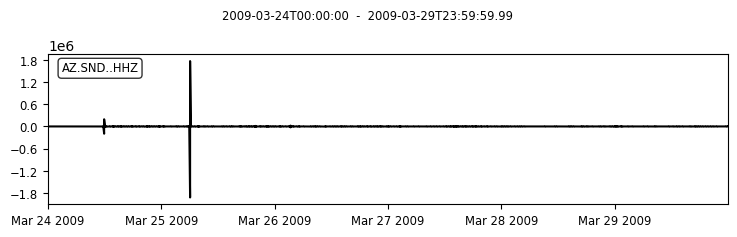

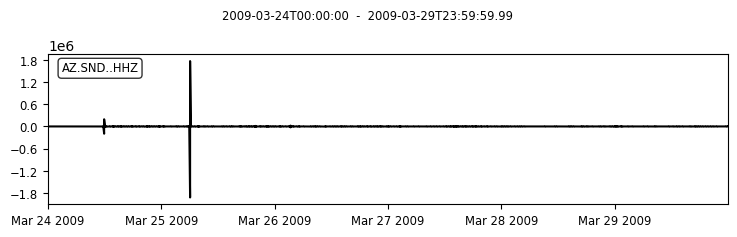

In [73]:
land_st1.plot()

In [16]:
from ground_motion_qh import extract_pairs



In [33]:
import numpy as np


selected_times = np.random.choice(land_st1[0].times(), 100, replace=False)

In [34]:
selected_times

array([44036.46, 57438.13, 57178.71, 54972.66, 81292.09, 49000.85,
       18628.73, 74210.49, 60874.47, 32106.85, 69578.04, 28988.09,
        4542.81, 26942.66, 42427.59, 15018.26,  5856.3 , 78966.81,
       15948.77, 65596.93, 11707.08, 29765.99, 36939.25, 49267.93,
       69247.81, 28581.11, 46293.87, 10313.6 , 26595.24, 18550.29,
       71002.08, 25177.55, 19832.25, 63039.3 , 85771.94, 32026.5 ,
       16956.68, 58534.46, 28981.41, 38598.63, 83682.61,  6195.81,
       79187.26, 52645.43, 36449.69, 39909.84, 55814.37, 47895.28,
        8907.08, 14174.81, 24151.41, 60891.45, 83273.31, 72322.17,
       85811.31, 11656.64, 11509.67, 78964.33, 72760.  , 60743.02,
        9600.78, 76709.61, 41496.69, 48056.93, 30529.6 , 30871.52,
       61925.2 , 85483.34, 80619.29, 72613.44, 10726.19, 74675.69,
       33900.13, 56508.7 , 29315.23, 47010.65, 57460.92, 77754.23,
        9410.33,  7518.36, 10969.82, 49035.76, 13216.46, 58278.83,
       14099.53, 33835.93, 45724.7 ,  6324.54, 80558.23, 12819

In [42]:
import importlib
importlib.reload(extract_pairs)

<module 'ground_motion_qh.extract_pairs' from '/mnt/c/Users/user/Documents/code/GroundMotion_GH/ground_motion_qh/extract_pairs.py'>

In [41]:
land_st1[0].times()/(24*3600)

array([0.00000000e+00, 1.15740741e-07, 2.31481481e-07, ...,
       9.99999653e-01, 9.99999769e-01, 9.99999884e-01], shape=(8640000,))

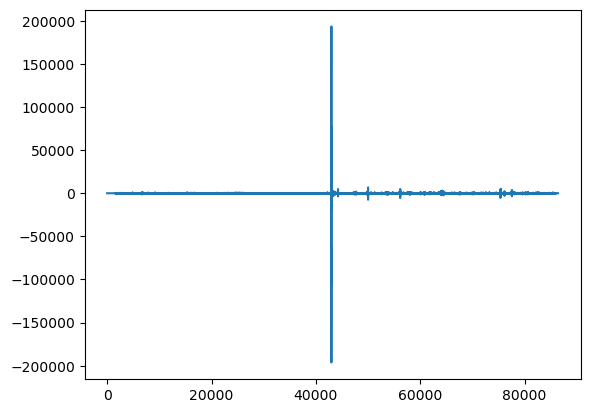

In [67]:
from matplotlib import pyplot as plt
# %matplotlib widget

# zoom_logical = 

# plt.plot(land_st1[0].times()[:1000], land_st1[0].data[:1000])
plt.plot(land_st1[0].times(), land_st1[0].data)
# plt.plot(selected_times, [0]*len(selected_times), 'r*')

np.float64(0.9)

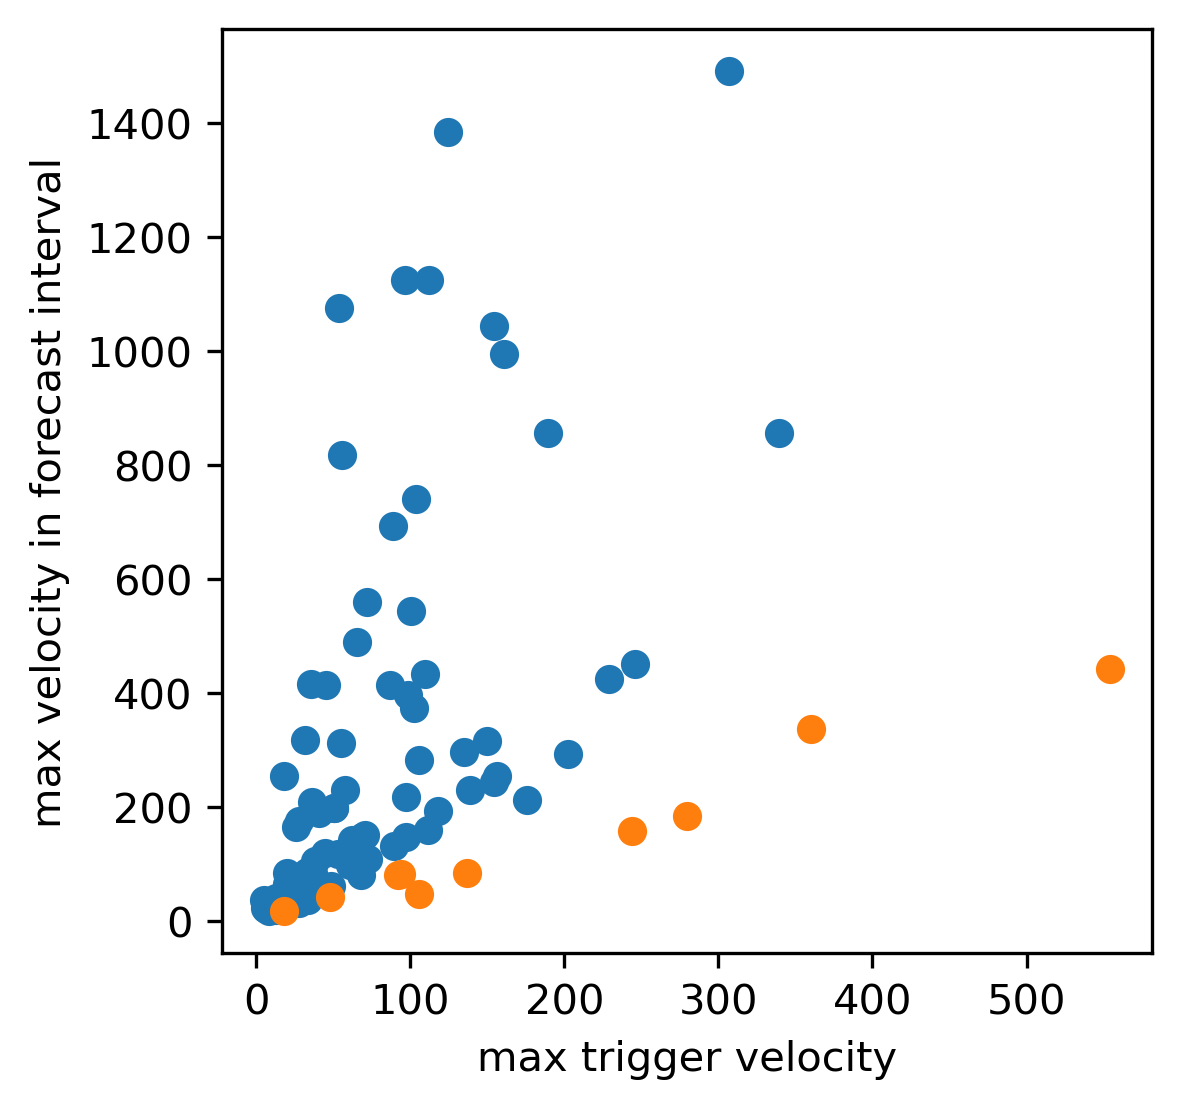

In [77]:

from matplotlib import pyplot as plt


a_minus_vector, a_plus_vector = extract_pairs.waveform_to_max_amp_pairs(
    selected_times,
    land_st1[0].data,
    land_st1[0].times(),
    # tw_minus=TW_MINUS,
    # tw_plus=TW_PLUS,
    # tw_buffer=TW_BUFFER,
)

above_logical = a_plus_vector>a_minus_vector

fig, ax = plt.subplots(dpi=300, figsize = (4,4))
ax.scatter(a_minus_vector[above_logical], a_plus_vector[above_logical])
ax.scatter(a_minus_vector[~above_logical], a_plus_vector[~above_logical])

ax.set_xlabel('max trigger velocity')
ax.set_ylabel('max velocity in forecast interval')
# plt.plot(2*[np.min(a_minus_vector.min(), a_plus_vector.min())],2*[np.max(a_minus_vector.max(), a_plus_vector.max())])
# plt.plot([-7000, 5000], [-7000, 5000], 'k--')

np.mean(a_plus_vector>a_minus_vector)

